<a href="https://colab.research.google.com/github/Shubham999-code/trader-sentiment-analysis/blob/main/Trader_Behavior_and_Market_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Libraries**

In [20]:
# Import pandas for data manipulation
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import matplotlib for basic plotting
import matplotlib.pyplot as plt

# Import seaborn for advanced visualization
import seaborn as sns

# Set a clean and modern style for all seaborn plots
sns.set(style="whitegrid")


 **Step 2: Load Datasets**

In [21]:
# Load trader activity data from CSV
trader_df = pd.read_csv('/content/historical_data.csv')

# Load market sentiment (fear & greed index) data from CSV
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')


 **Step 3: Data Preprocessing - Clean and Merge Data**

In [22]:
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')


**Step 4: Exploratory Data Analysis (EDA)**

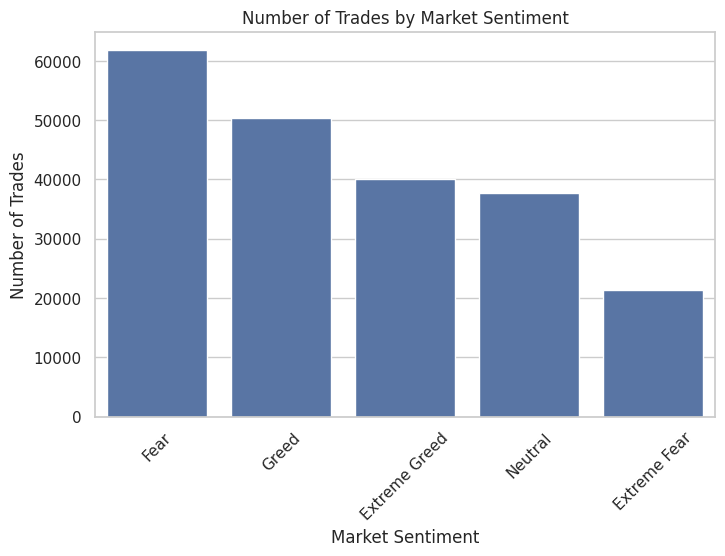

In [23]:
# Number of Trades by Market Sentiment
# Set figure size for better visibility
plt.figure(figsize=(8,5))

# Create a bar plot showing the number of trades for each market sentiment type
sns.countplot(data=merged_df, x='classification', order=merged_df['classification'].value_counts().index)

# Add chart title and axis labels
plt.title('Number of Trades by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


<ipython-input-24-4215b39d0dd5>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator=np.mean, ci=None)


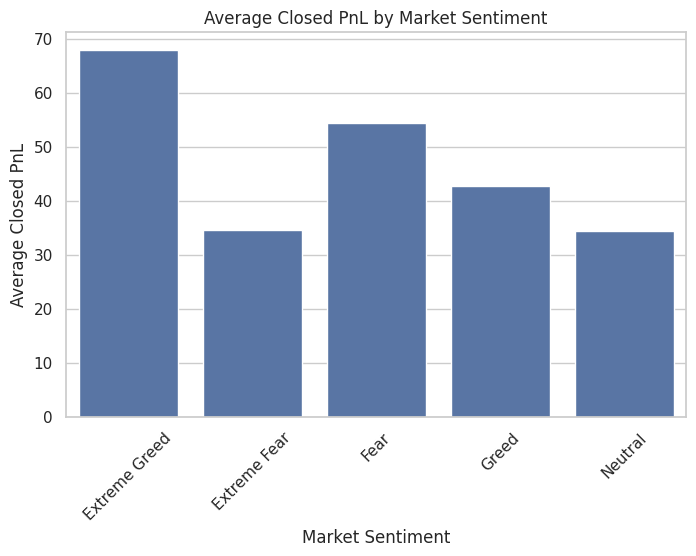

In [24]:
# Average Closed PnL by Sentiment
plt.figure(figsize=(8,5))

# Create a bar plot showing average PnL for each sentiment
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator=np.mean, ci=None)

plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.show()


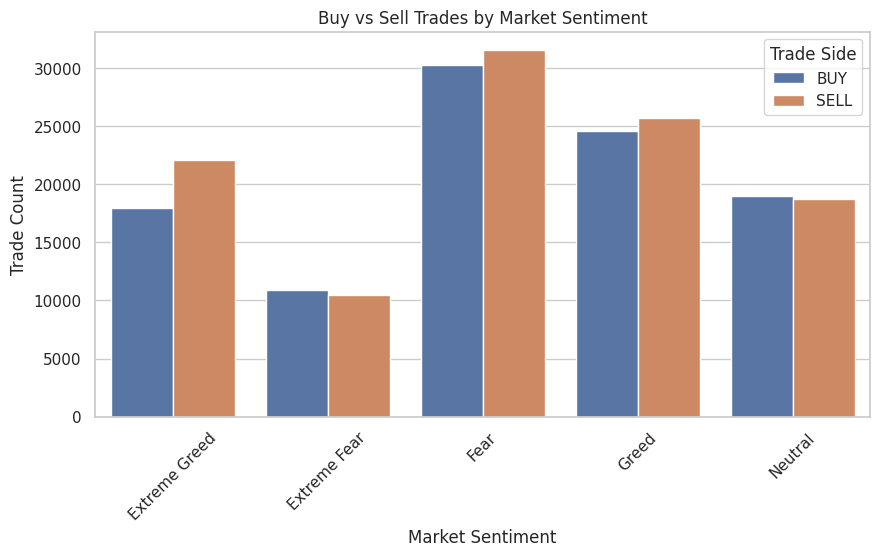

In [25]:
# Trade Side (BUY/SELL) by Sentiment
plt.figure(figsize=(10,5))

# Countplot showing how many BUY/SELL trades were made under each sentiment
sns.countplot(data=merged_df, x='classification', hue='Side')

plt.title('Buy vs Sell Trades by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Count')
plt.xticks(rotation=45)
plt.legend(title='Trade Side')
plt.show()


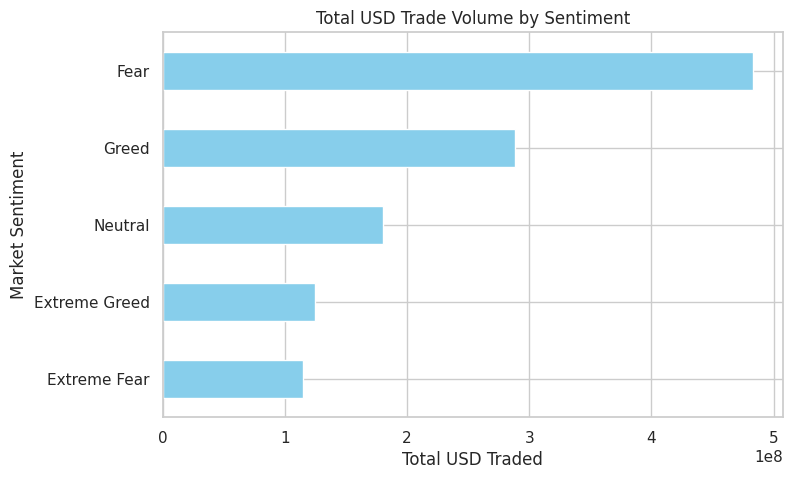

In [26]:
# Total Trade Volume (USD) by Sentiment
# Group by sentiment and sum USD size for each sentiment category
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].sum().sort_values()

plt.figure(figsize=(8,5))

# Create a horizontal bar plot of total USD traded for each sentiment
volume_by_sentiment.plot(kind='barh', color='skyblue')

plt.title('Total USD Trade Volume by Sentiment')
plt.xlabel('Total USD Traded')
plt.ylabel('Market Sentiment')
plt.show()


**Step 5: Extract Key Insights**

In [27]:
# Generate useful summary insights for reporting or dashboard
insights = {
    "Most Trades": merged_df['classification'].value_counts().idxmax(),  # sentiment with most trades
    "Highest Avg PnL Sentiment": merged_df.groupby('classification')['Closed PnL'].mean().idxmax(),  # best avg returns
    "Highest Trade Volume Sentiment": volume_by_sentiment.idxmax(),  # sentiment with highest USD volume
    "Buy vs Sell Split (Extreme Greed)": merged_df[merged_df['classification'] == 'Extreme Greed']['Side'].value_counts().to_dict()  # trade side split
}

# Print each insight clearly
for k, v in insights.items():
    print(f"{k}: {v}")


Most Trades: Fear
Highest Avg PnL Sentiment: Extreme Greed
Highest Trade Volume Sentiment: Fear
Buy vs Sell Split (Extreme Greed): {'SELL': 22052, 'BUY': 17940}


**Step 6: Save Final Merged Dataset**

In [28]:
# Save the final dataframe with merged sentiment data to a new CSV
merged_df.to_csv('trader_sentiment_merged.csv', index=False)
